# Setup

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


In [14]:
!pip install jupyter-dash

In [15]:
!pip install dash-bootstrap-components

In [2]:
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
from datetime import date

# Viz 2

In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


In [18]:
!pip install jupyter-dash

In [19]:
!pip install dash-bootstrap-components

In [4]:
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
from datetime import date

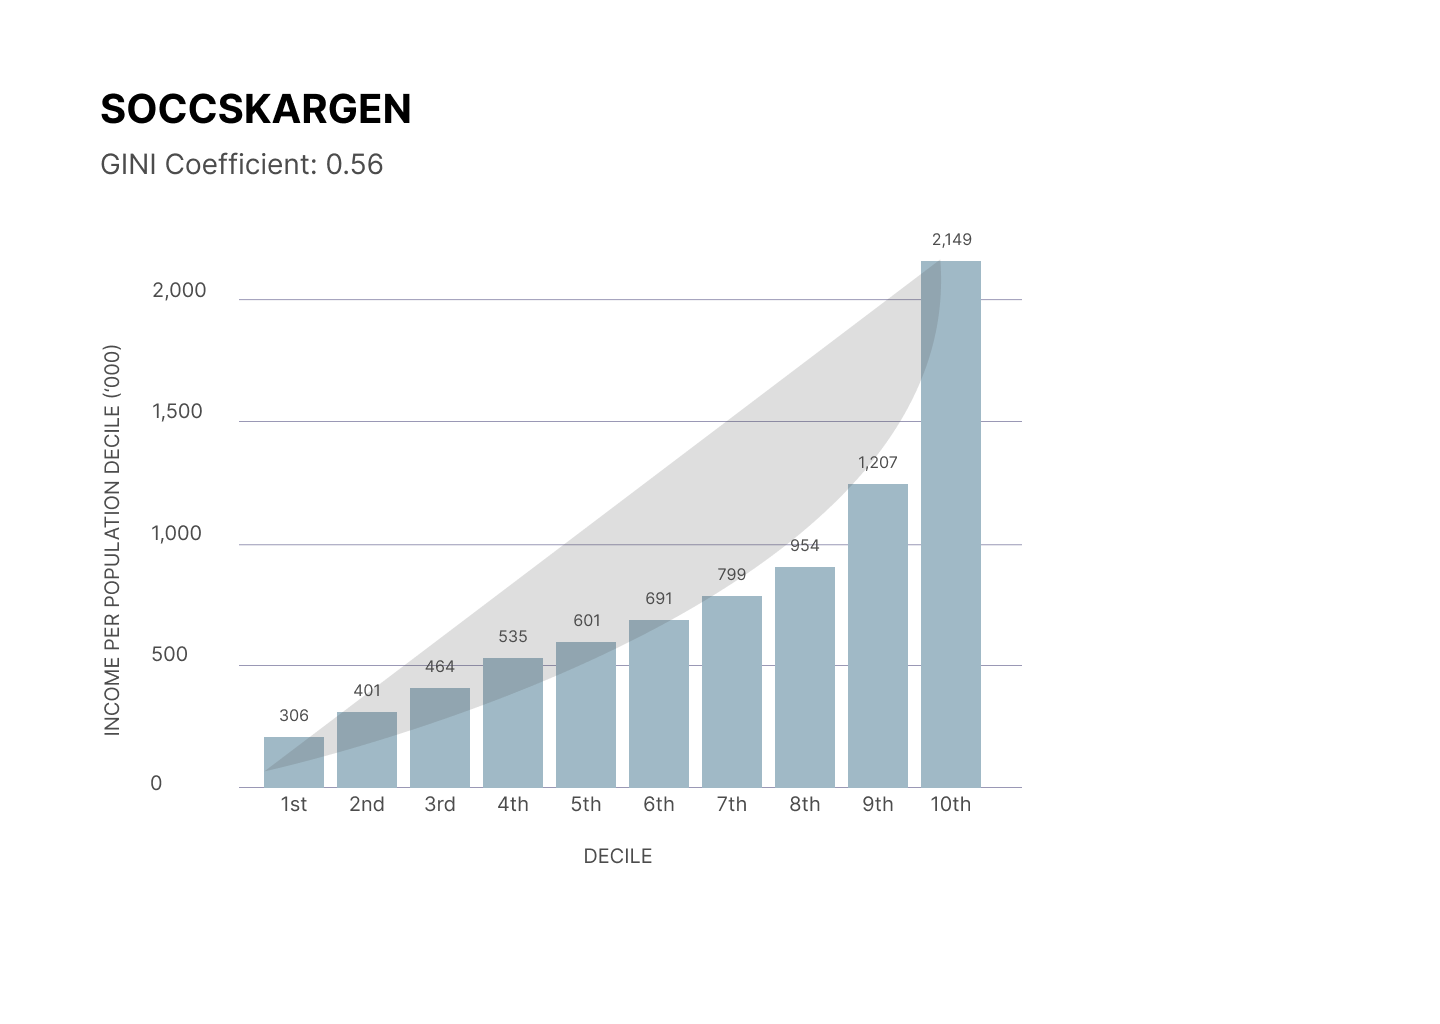

## Load the Excel file from Drive

In [5]:
df = pd.read_excel('Table 2_FIES.xlsx')
df

,Region,Decile,TotalIncome,AverageIncome,TotalIncome_SE,AverageIncome_SE,TotalIncome_COV,AverageIncome_COV
0,Philippines,First Decile,306262.87,116.02,4542.47,0.59,1.5,0.5
1,Philippines,Second Decile,401607.22,152.14,5316.33,0.65,1.3,0.4
2,Philippines,Third Decile,464150.01,175.86,6148.39,0.80,1.3,0.5
3,Philippines,Fourth Decile,535044.82,202.66,7546.13,0.97,1.4,0.5
4,Philippines,Fifth Decile,601018.25,227.68,8314.35,1.16,1.4,0.5
...,...,...,...,...,...,...,...,...
175,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO,Sixth Decile,12700.56,182.57,641.85,3.24,5.1,1.8
176,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO,Seventh Decile,13487.08,194.24,814.43,3.81,6.0,2.0
177,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO,Eighth Decile,13634.05,195.89,779.11,3.67,5.7,1.9
178,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO,Ninth Decile,14891.13,213.96,883.38,4.24,5.9,2.0


In [6]:
df.columns

Index(['Region', 'Decile', 'TotalIncome', 'AverageIncome', 'TotalIncome_SE',
       'AverageIncome_SE', 'TotalIncome_COV', 'AverageIncome_COV'],
      dtype='object')

In [7]:
df.dtypes

Region                object
Decile                object
TotalIncome          float64
AverageIncome        float64
TotalIncome_SE       float64
AverageIncome_SE     float64
TotalIncome_COV      float64
AverageIncome_COV    float64
dtype: object

## Extract needed columns, remove Philippines values, and rename header

In [8]:
df = df[['Region', 'Decile', 'TotalIncome']]
df = df.drop(index=range(10))
df = df.rename(columns={'TotalIncome': 'Total Income', 'Region': 'Table2_FIES'})

df

,Table2_FIES,Decile,Total Income
10,NCR,First Decile,77163.78
11,NCR,Second Decile,91809.85
12,NCR,Third Decile,103516.90
13,NCR,Fourth Decile,113145.22
14,NCR,Fifth Decile,125436.46
...,...,...,...
175,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO,Sixth Decile,12700.56
176,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO,Seventh Decile,13487.08
177,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO,Eighth Decile,13634.05
178,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO,Ninth Decile,14891.13


## Map proper region names

In [9]:
df_mapping = pd.read_excel('RegionMapping.xlsx', sheet_name = 'Sheet1')
df_mapping.columns

Index(['Unnamed: 0', 'Table X_XXX', 'Table2_FIES', 'Acronym', 'Name',
       'Combined'],
      dtype='object')

In [10]:
df2 = pd.merge(df, df_mapping, on='Table2_FIES', how='inner')
df2 = df2.iloc[:, [7,1,2]]
df2 = df2.rename(columns={'Combined': 'Region'})

df2

,Region,Decile,Total Income
0,NCR - National Capital Region,First Decile,77163.78
1,NCR - National Capital Region,Second Decile,91809.85
2,NCR - National Capital Region,Third Decile,103516.90
3,NCR - National Capital Region,Fourth Decile,113145.22
4,NCR - National Capital Region,Fifth Decile,125436.46
...,...,...,...
165,BARMM - Bangsamoro Autonomous Region in Muslim...,Sixth Decile,12700.56
166,BARMM - Bangsamoro Autonomous Region in Muslim...,Seventh Decile,13487.08
167,BARMM - Bangsamoro Autonomous Region in Muslim...,Eighth Decile,13634.05
168,BARMM - Bangsamoro Autonomous Region in Muslim...,Ninth Decile,14891.13


# Viz2b

# Setup

# Viz 9

# Viz 10

# Insights

In [12]:
# Creating the app
page = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


page.layout = dbc.Container([

    
    # Header

    
    html.Nav(
    html.Ul([
        html.Li([
            html.A('Home', href='#', className='nav-link', style={'border': '1px solid grey'})
        ], className='nav-item'),
        html.Li([
            html.A('Understanding Poverty', href='#', className='nav-link', style={'border': '1px solid grey'})
        ], className='nav-item'),
        html.Li([
            html.A('Zooming in on Employment', href='#', className='nav-link', style={'border': '1px solid grey'})
        ], className='nav-item'),
        html.Li([
            html.A('Finding Opportunities', href='#', className='nav-link', style={'border': '1px solid grey'})
        ], className='nav-item')
    ], className='nav'),

),
  
  # Line Breaks

     html.Div([
          html.Br(), html.Br(), html.Br(), html.Br(),  html.Br(), 
     ]),
    
    
    # Header 1 
    html.Section([
        html.H2("Understanding Poverty", className="text-center mb-3"),
        html.H5("", className="text-center mb-5"),
    ]),
    
    html.Div([
        html.Label("Select a column"),
        dcc.Dropdown(id='dropdown',
                     options = [{'label': region, 'value': region} for region in df2['Region'].unique()],
                    value=df2['Region'].unique()[0],
                    multi=False,
                    clearable=False,
                    style={"width": "50%"}),
        dcc.Graph(id='bar_decile', animate = True)
    ]),

])

# Updating the graph based on dropdown
@page.callback(
    Output("bar_decile", "figure"), 
    [Input("dropdown", "value")]
)

    
def update_graph(my_dropdown):
    filtered_df = df2[df2['Region'] == my_dropdown]
    bar_decile = px.bar(filtered_df, x="Decile", y="Total Income", text="Total Income", title="Total Income by Region and Decile")
    bar_decile.update_traces(textposition="auto")

    bar_decile.update_layout(transition_duration=500) # set the duration of the transition
    return bar_decile

if __name__ == '__main__':
  page.run_server(debug=True, port = 8029)

Dash app running on http://127.0.0.1:8029/
